<a href="https://colab.research.google.com/github/Tshego1234/Predicting-GDP-within-SADC-regions-through-machine-learning-/blob/main/MSDA_304_using_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GDP PREDICTIVE MODEL FOR SADC COUNTRIES**

In [ ]:
# Importing neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt

In [ ]:
#Loading the file - Extracted data file from World Bank
World_data = pd.read_csv('/content/WorldBankIndicators.csv')

# EDA (Exploratory Data Analysis) After Data Cleaning

In [ ]:
# Printing the columns of the World_data DataFrame
World_data.columns

Index(['Country Code', 'Year', 'GDP Growth%', 'GDP', 'GDP Per Capita',
       'GDP Government pp', 'GDP Private pp', 'Investment', 'Inflation',
       'Renewable Energy', 'Unemployment', 'Employment', 'Human Capital Index',
       'Agriculture Employment', 'Vulnerable Employment',
       'Population in Slums', 'Freshwater Resources', 'Imports', 'Exports',
       'FDI', 'Government Debt', 'Real Interest Rate', 'Gini Index',
       'Current Account Balance', 'Population', 'Population Density',
       'Population Growth', 'Life Expectancy', 'Death Rate', 'Child Mortality',
       'Renewable Energy Output', 'Agricultural Land', 'Electricity Access',
       'Power Consumption', 'Fuel Exports', 'Metal Exports', 'CO2 Emissions',
       'ghg Emissions', 'Industry GDP', 'Value Added Services',
       'School Enrollment', 'Literacy', 'Bachelor', 'Homicide', 'Research'],
      dtype='object')

In [ ]:
# Displaying concise summary of World_data DataFrame, including data types and non-null counts
World_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4764 entries, 0 to 4763
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country Code             4764 non-null   object 
 1   Year                     4764 non-null   int64  
 2   GDP Growth%              4297 non-null   float64
 3   GDP                      4290 non-null   float64
 4   GDP Per Capita           4290 non-null   float64
 5   GDP Government pp        3599 non-null   float64
 6   GDP Private pp           3628 non-null   float64
 7   Investment               1919 non-null   float64
 8   Inflation                4311 non-null   float64
 9   Renewable Energy         4614 non-null   float64
 10  Unemployment             2398 non-null   float64
 11  Employment               1941 non-null   float64
 12  Human Capital Index      0 non-null      float64
 13  Agriculture Employment   4206 non-null   float64
 14  Vulnerable Employment   

In [ ]:
# Generating descriptive statistics of the numeric columns in the World_data DataFrame
World_data.describe()

Year  GDP Growth%           GDP  GDP Per Capita  \
count  4764.000000  4297.000000  4.290000e+03     4290.000000   
mean   2000.457179     3.818529  1.569032e+12    11764.992176   
std       5.166436     6.061096  5.696188e+12    18316.767332   
min    1992.000000   -50.248067  2.296336e+07      179.614033   
25%    1996.000000     1.743116  5.533878e+09     1384.183082   
50%    2000.000000     3.921518  3.371199e+10     3784.877424   
75%    2005.000000     6.112396  3.974982e+11    13258.568290   
max    2009.000000   149.972963  6.301713e+13   163097.966734   

       GDP Government pp  GDP Private pp   Investment     Inflation  \
count        3599.000000     3628.000000  1919.000000   4311.000000   
mean           16.300611       63.959521     2.902645     39.081325   
std             8.144101       15.582149     3.361504    513.910851   
min             2.047121       12.711792    -7.040018    -31.565915   
25%            11.894700       54.498796     1.145659      2.499111   
50%            15.373106       62.635396     1.948209      5.606065   
75%            19.160290       73.633220     3.591958     10.690378   
max           147.735004      165.503835    39.617093  26765.858252   

       Renewable Energy  Unemployment  ...  Metal Exports  CO2 Emissions  \
count       4614.000000   2398.000000  ...    3270.000000    4277.000000   
mean          31.758426      8.471780  ...       6.961731       4.153977   
std           30.744994      6.036431  ...      12.572961       5.354093   
min            0.000000      0.039000  ...       0.000000       0.000000   
25%            4.470838      4.421750  ...       0.901999       0.643018   
50%           21.530000      7.241027  ...       2.740828       2.219736   
75%           55.975000     10.745000  ...       6.202207       6.158754   
max           98.340000     57.000000  ...      88.179138      47.656962   

       ghg Emissions  Industry GDP  Value Added Services  School Enrollment  \
count     850.000000   3915.000000           3306.000000        2998.000000   
mean      -37.637596     27.562665          21804.875571           0.947217   
std       152.360933     11.197331          28022.787314           0.107151   
min     -1033.640402      3.150204            583.239540           0.000000   
25%       -27.962362     20.690238           4619.585889           0.900360   
50%        -8.017269     26.301210          11277.276411           0.985600   
75%        -0.311903     32.493884          22548.929155           1.011965   
max      1329.050000     86.669555         230906.208601           1.202740   

          Literacy   Bachelor     Homicide     Research  
count  1036.000000  71.000000  2168.000000  1068.000000  
mean     73.870418  12.660989     8.577588  1768.705932  
std      18.053605   6.927176    12.761888  1599.594039  
min      10.894650   0.341150     0.000000     6.002600  
25%      58.350363   8.174330     1.509270   400.598051  
50%      76.604424  10.646990     3.647155  1360.588379  
75%      90.274170  18.018955     9.997089  2894.311401  
max      99.998192  33.811131   138.773986  7994.137207  

[8 rows x 44 columns]

In [ ]:
# Displaying the first few rows of the World_data DataFrame to get a quick overview of the data
World_data.head()


Country Code  Year  GDP Growth%           GDP  GDP Per Capita  \
0          ZWE  1992    -9.015570  1.600947e+10     1504.437140   
1          ZMB  1992    -1.730922  6.720005e+09      832.267134   
2          YEM  1992     8.207598  2.750967e+10     1905.924245   
3          PSE  1992          NaN           NaN             NaN   
4          VIR  1992          NaN           NaN             NaN   

   GDP Government pp  GDP Private pp  Investment   Inflation  \
0          24.158070       64.863924         NaN  -14.129658   
1                NaN             NaN         NaN  165.533954   
2          17.471673       82.081394         NaN   13.171745   
3                NaN             NaN         NaN         NaN   
4                NaN             NaN         NaN         NaN   

   Renewable Energy  ...  Metal Exports  CO2 Emissions  ghg Emissions  \
0             64.37  ...      15.104396       1.735620            NaN   
1             82.73  ...            NaN       0.352722            NaN   
2              1.31  ...            NaN       0.632544            NaN   
3             21.53  ...            NaN            NaN            NaN   
4              0.47  ...            NaN            NaN            NaN   

   Industry GDP  Value Added Services  School Enrollment   Literacy  Bachelor  \
0     37.212145           4104.536704            0.94515  83.512581       NaN   
1     43.734804           4145.485858                NaN        NaN       NaN   
2     31.388646           4770.029730                NaN        NaN       NaN   
3           NaN                   NaN                NaN        NaN       NaN   
4           NaN                   NaN                NaN        NaN       NaN   

   Homicide  Research  
0       NaN       NaN  
1  9.511616       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  

[5 rows x 45 columns]

# Feature Engineering

In [ ]:
# Perform some calculations to create a new column (replace 'new_column_name' and the calculation as needed)
World_data['Net Exports'] = World_data['Exports'] - World_data['Imports']  # Example: multiplying an existing column by 2

# Save the DataFrame with the new column back to a CSV file
World_data.to_csv('DataWithNet.csv', index=False)

In [ ]:
#Saving new column into new csv file
World_data = pd.read_csv('/content/DataWithNet.csv')

In [ ]:
#Checking if the new column has been added
World_data.columns

Index(['Country Code', 'Year', 'GDP Growth%', 'GDP', 'GDP Per Capita',
       'GDP Government pp', 'GDP Private pp', 'Investment', 'Inflation',
       'Renewable Energy', 'Unemployment', 'Employment', 'Human Capital Index',
       'Agriculture Employment', 'Vulnerable Employment',
       'Population in Slums', 'Freshwater Resources', 'Imports', 'Exports',
       'FDI', 'Government Debt', 'Real Interest Rate', 'Gini Index',
       'Current Account Balance', 'Population', 'Population Density',
       'Population Growth', 'Life Expectancy', 'Death Rate', 'Child Mortality',
       'Renewable Energy Output', 'Agricultural Land', 'Electricity Access',
       'Power Consumption', 'Fuel Exports', 'Metal Exports', 'CO2 Emissions',
       'ghg Emissions', 'Industry GDP', 'Value Added Services',
       'School Enrollment', 'Literacy', 'Bachelor', 'Homicide', 'Research',
       'Net Exports'],
      dtype='object')

In [ ]:
# Displaying the first few rows of the World_data DataFrame for a quick overview of the data
World_data.head()

Country Code  Year  GDP Growth%           GDP  GDP Per Capita  \
0          ZWE  1992    -9.015570  1.600947e+10     1504.437140   
1          ZMB  1992    -1.730922  6.720005e+09      832.267134   
2          YEM  1992     8.207598  2.750967e+10     1905.924245   
3          PSE  1992          NaN           NaN             NaN   
4          VIR  1992          NaN           NaN             NaN   

   GDP Government pp  GDP Private pp  Investment   Inflation  \
0          24.158070       64.863924         NaN  -14.129658   
1                NaN             NaN         NaN  165.533954   
2          17.471673       82.081394         NaN   13.171745   
3                NaN             NaN         NaN         NaN   
4                NaN             NaN         NaN         NaN   

   Renewable Energy  ...  CO2 Emissions  ghg Emissions  Industry GDP  \
0             64.37  ...       1.735620            NaN     37.212145   
1             82.73  ...       0.352722            NaN     43.734804   
2              1.31  ...       0.632544            NaN     31.388646   
3             21.53  ...            NaN            NaN           NaN   
4              0.47  ...            NaN            NaN           NaN   

   Value Added Services  School Enrollment   Literacy  Bachelor  Homicide  \
0           4104.536704            0.94515  83.512581       NaN       NaN   
1           4145.485858                NaN        NaN       NaN  9.511616   
2           4770.029730                NaN        NaN       NaN       NaN   
3                   NaN                NaN        NaN       NaN       NaN   
4                   NaN                NaN        NaN       NaN       NaN   

   Research  Net Exports  
0       NaN    -9.257967  
1       NaN          NaN  
2       NaN   -13.726695  
3       NaN          NaN  
4       NaN          NaN  

[5 rows x 46 columns]

# Data Selection

In [ ]:
#Creating a list of columns which are not substantially correlated to GDP
columns_to_delete = ['Homicide',
                  'Research',
                  'Value Added Services',
                  'Bachelor','CO2 Emissions',
                  'ghg Emissions',
                  'Metal Exports',
                'Fuel Exports',
                  'Agricultural Land',
                  'Power Consumption',
                  'Population in Slums',
                  'Freshwater Resources',
                  'Vulnerable Employment',
                  'Agriculture Employment',
                     'Industry GDP',
                     'Electricity Access',
                     'Renewable Energy Output',
                     'School Enrollment',
                     'Child Mortality',
                    'Renewable Energy',
                      'Population Density',
                      'Human Capital Index',
                      'Death Rate',
                      'GDP Per Capita',
                      'Current Account Balance'
                     ]

In [ ]:
# Deleting said columns
World_data.drop(columns=columns_to_delete, inplace=True, )

In [ ]:
# List of different values in the specific column
values_to_select = ['ZME', 'ZMB', 'BWA', 'AGO', 'LSO','SWZ','ZAF','MUS','MWI','MDG','MOZ','NAM']

# Select rows where the values in a specific column are in the list of values
SADC_Countries = World_data[World_data['Country Code'].isin(values_to_select)]
print(SADC_Countries)

     Country Code  Year  GDP Growth%           GDP  GDP Government pp  \
1             ZMB  1992    -1.730922  6.720005e+09                NaN   
39            ZAF  1992    -2.137033  1.793584e+11          17.900559   
80            NAM  1992     7.189343  4.536302e+09          26.682224   
82            MOZ  1992    -7.576647  2.806992e+09                NaN   
90            MUS  1992     6.512699  4.487793e+09          13.312045   
...           ...   ...          ...           ...                ...   
4620          MDG  2009    -3.978709  9.864124e+09          12.508634   
4627          LSO  2009    -1.253758  1.887282e+09          43.482316   
4675          SWZ  2009     1.565049  3.390091e+09          21.824748   
4713          BWA  2009   -14.144235  1.031052e+10          35.937759   
4733          AGO  2009     0.860000  6.949945e+10          19.898586   

      GDP Private pp  Investment   Inflation  Unemployment  Employment  ...  \
1                NaN         NaN  165.533954

# Data Cleaning


In [ ]:
# Counting the number of missing (null) values in each column of the World_data DataFrame
World_data.isnull().sum()

Country Code             0
Year                     0
GDP Growth%            467
GDP                    474
GDP Government pp     1165
GDP Private pp        1136
Investment            2845
Inflation              453
Unemployment          2366
Employment            2823
Imports                937
Exports                982
FDI                    536
Government Debt       3676
Real Interest Rate    2781
Gini Index            3845
Population              19
Population Growth       19
Life Expectancy        144
Literacy              3728
Net Exports            982
dtype: int64

[Text(0.5, 1.0, 'Missing Data'),
 Text(0.5, 23.52222222222222, 'Columns'),
 Text(50.722222222222214, 0.5, 'Data Points')]

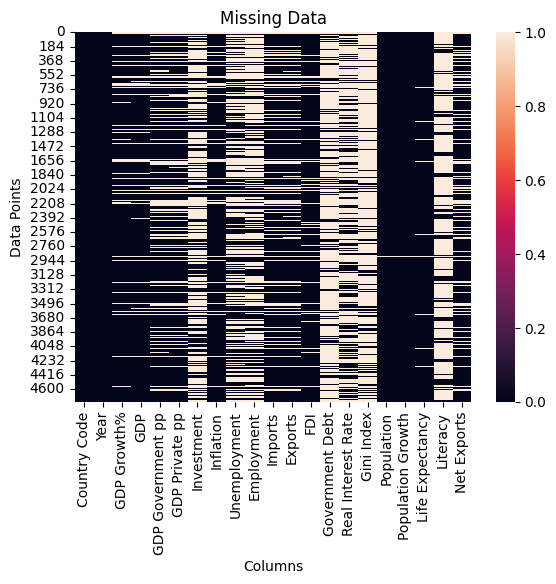

In [ ]:
#Creating a heat map to visualize the missing data
sns.heatmap(World_data.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

In [ ]:
# Interpolate missing values and null values
WorldData_interpolate = World_data.interpolate(method='linear')

In [ ]:
# Checking if the interpolation managed to clear out the missing or null values
WorldData_interpolate.isnull().sum()

Country Code           0
Year                   0
GDP Growth%            0
GDP                    0
GDP Government pp      0
GDP Private pp         0
Investment             9
Inflation              0
Unemployment           8
Employment            10
Imports                0
Exports                0
FDI                    0
Government Debt        1
Real Interest Rate     1
Gini Index             5
Population             0
Population Growth      0
Life Expectancy        0
Literacy               0
Net Exports            0
dtype: int64

In [ ]:
# Impute missing values with mean
World_Data_mean = World_data.fillna(World_data.mean())

<ipython-input-18-7bf55941bca2>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  World_Data_mean = World_data.fillna(World_data.mean())


In [ ]:
#  Checking if imputing managed to clear out the missing or null values
World_Data_mean.isnull().sum()

Country Code          0
Year                  0
GDP Growth%           0
GDP                   0
GDP Government pp     0
GDP Private pp        0
Investment            0
Inflation             0
Unemployment          0
Employment            0
Imports               0
Exports               0
FDI                   0
Government Debt       0
Real Interest Rate    0
Gini Index            0
Population            0
Population Growth     0
Life Expectancy       0
Literacy              0
Net Exports           0
dtype: int64

In [ ]:
# Creating a heatmap of the correlation matrix of the World_data DataFrame
def build_pearson_correlation_matrix_of_dataframe(size_x,size_y,dataframe,correlation_target,correlation_minimum_criteria):

    # Using Pearson Correlation

    plt.figure(figsize=(size_x,size_y))
    cor = World_data.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    # Correlation with output variable

    target = abs(cor[correlation_target])

    #Selecting and printing highly correlated features

    relevant_features = target[target>correlation_minimum_criteria]
    print(relevant_features)

<ipython-input-20-828ff0576f5d>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = World_data.corr()


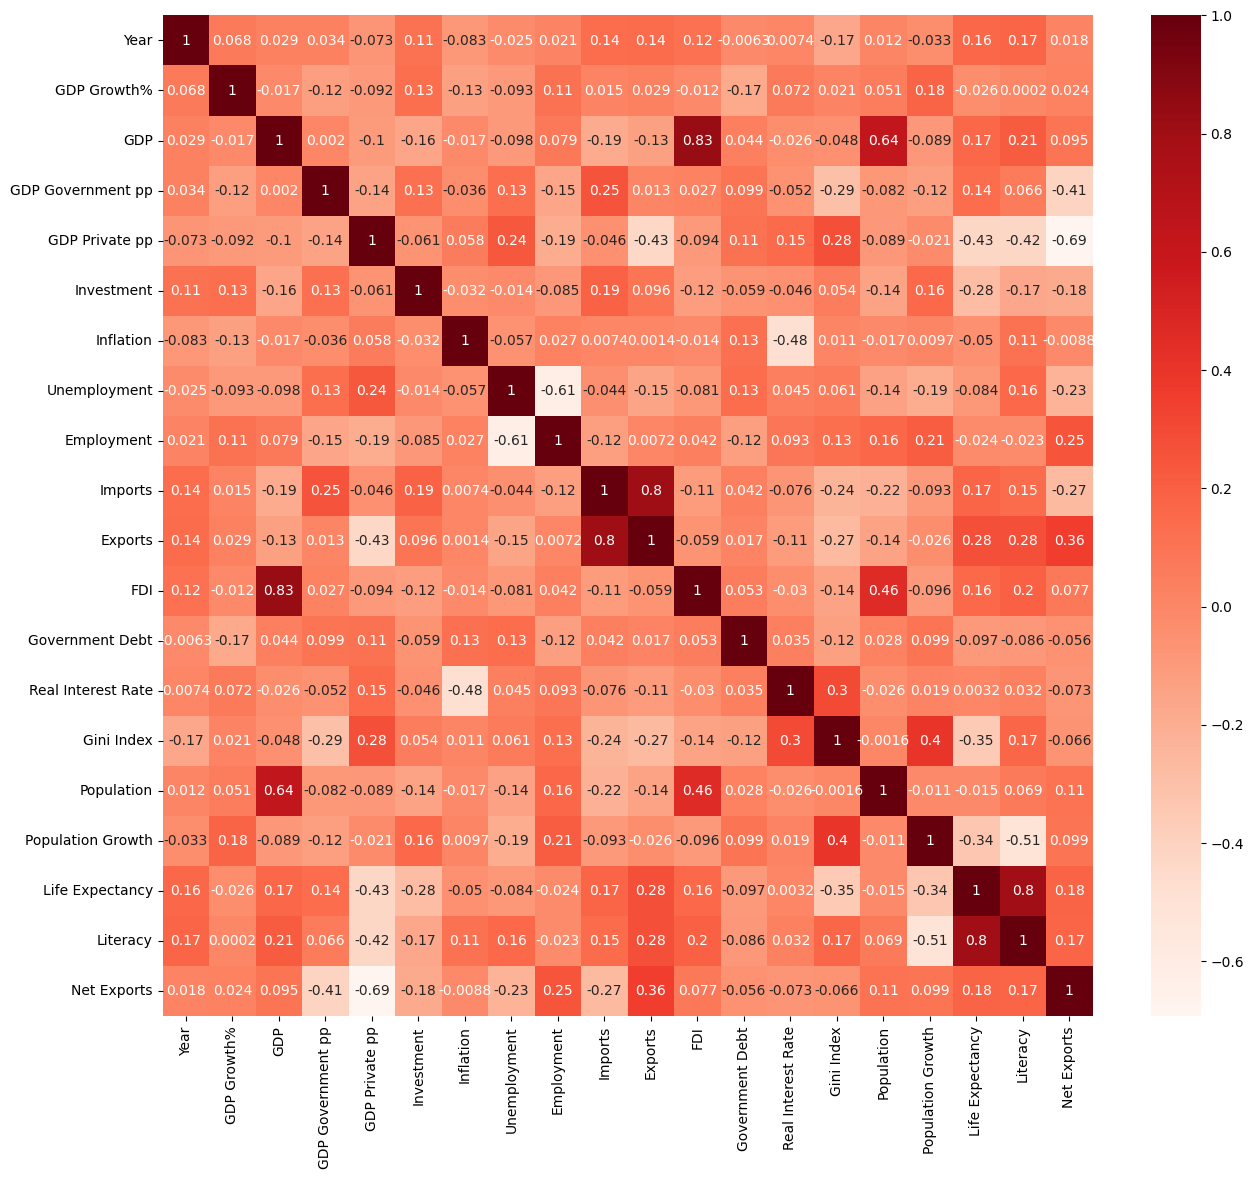

GDP           1.000000
FDI           0.832596
Population    0.635041
Literacy      0.214124
Name: GDP, dtype: float64


In [ ]:
build_pearson_correlation_matrix_of_dataframe(15, 13, World_Data_mean,'GDP', 0.2)

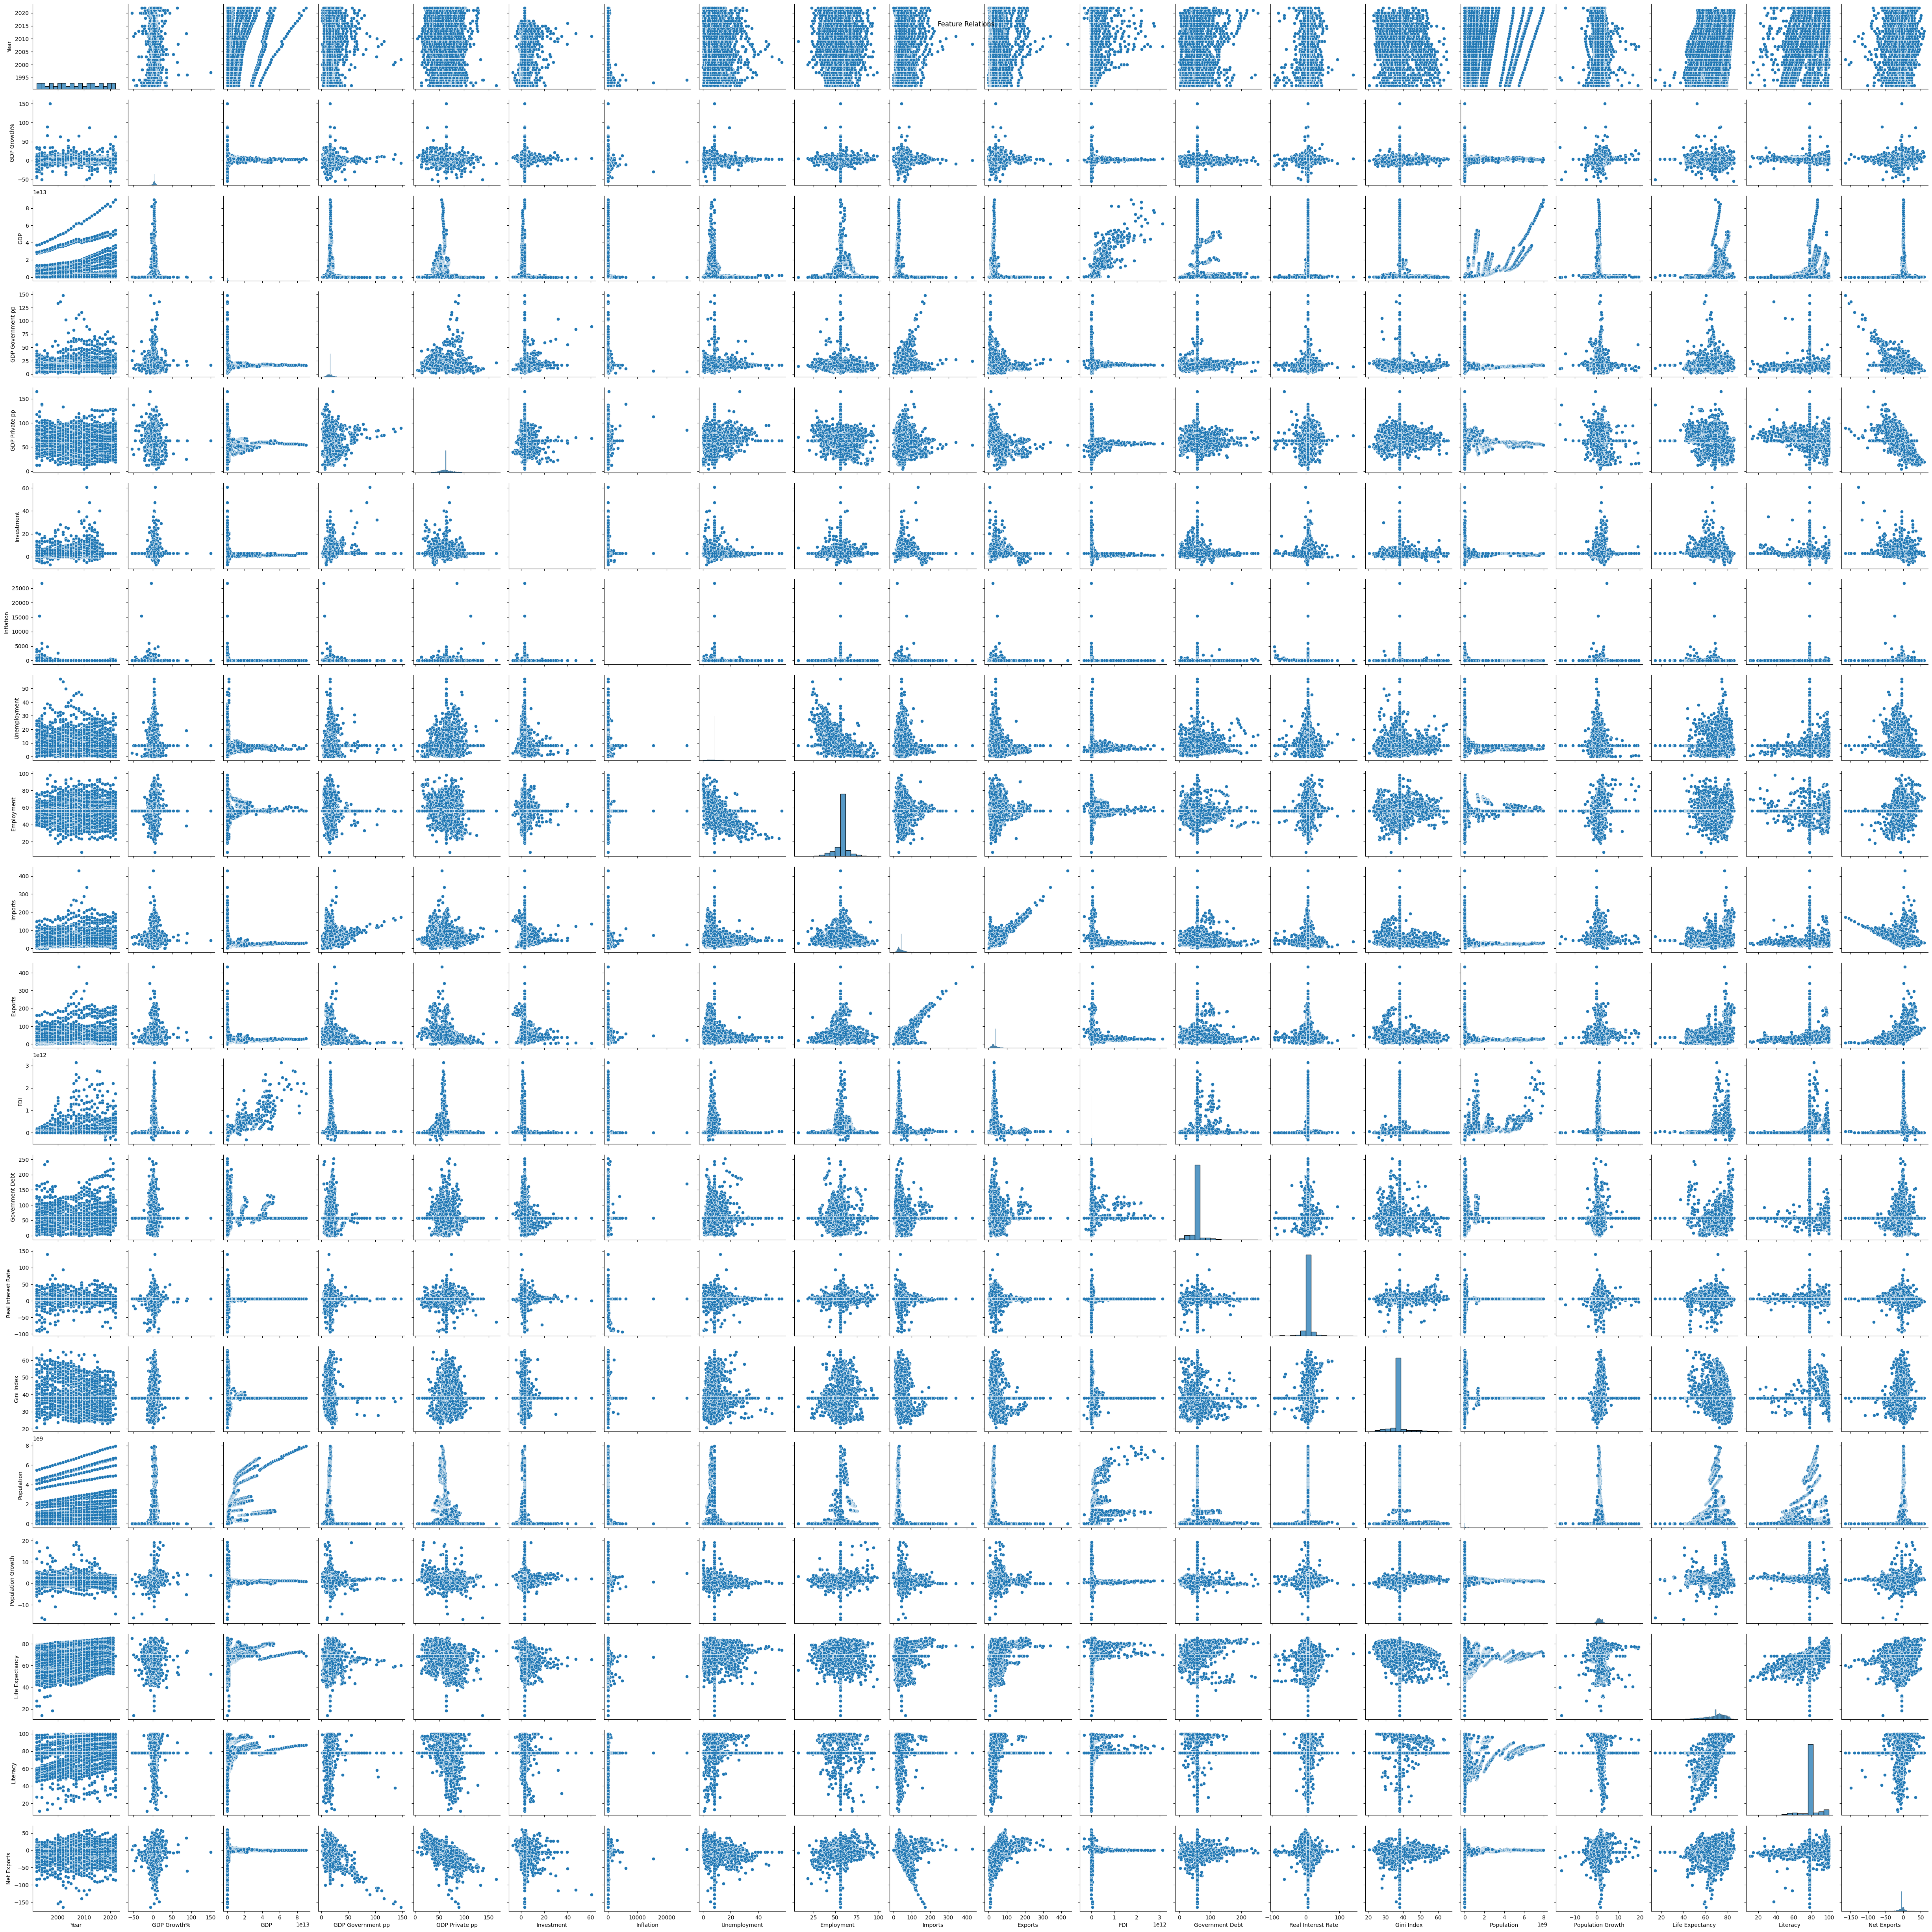

In [ ]:
#Creating pairplots to try and visualize data relationships

g = sns.pairplot(World_Data_mean)
g.fig.suptitle('Feature Relations')
plt.show()

<Figure size 1200x1200 with 0 Axes>

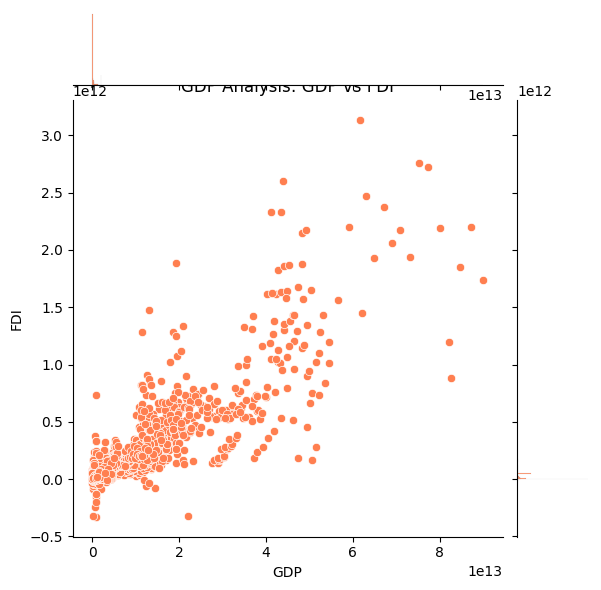

In [ ]:
# Analyzing specific feature relations

#Visualizing the relationship between "GDP" and "FDI" through the use of a jointplot

# Creating a figure with a specified size
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= World_Data_mean, x= 'GDP', y= 'FDI', color='coral')
plt.title('GDP Analysis: GDP vs FDI')


plt.show()

In [ ]:
#Visualizing the relationship between "GDP" and "Population" through the use of a jointplot

# Creating a figure with a specified size
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= World_Data_mean, x= 'GDP', y= 'Population', color='green')
plt.title('GDP Analysis: GDP vs Population')


plt.show()

In [ ]:
#Visualizing the relationship between "GDP" and "Net Exports" through the use of a jointplot

# Creating a figure with a specified size
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= World_Data_mean, x= 'GDP', y= 'Net Exports', color='Purple')
plt.title('GDP Analysis: GDP vs Net Exports')


plt.show()

# Model Development

#Linear Regression Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Min-Max scaling to transform the range of the features into a standardized range.

columns_to_scale = ['FDI', 'Population', 'Net Exports']

scaler = MinMaxScaler()
World_Data_mean[columns_to_scale] = scaler.fit_transform(World_Data_mean[columns_to_scale])

In [ ]:
World_Data_mean.head()

In [ ]:
# Linear Regression Model

# Extracting the target variable 'GDP' and creating the feature matrix X

y = World_Data_mean['GDP']
X = World_Data_mean.drop(['GDP','Country Code'], axis=1)

# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# Creating a StandardScaler instance
sc_X = StandardScaler()

# Standardizing the feature matrices for training and testing sets
X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)

# Keeping the target variables unchanged
y2_train = y_train
y2_test = y_test

In [ ]:
y2_train

In [ ]:
# Creating a new target variable 'y3'
y3 = y

# Creating a new feature matrix 'X3' by excluding specified columns
X3 = World_Data_mean.get(["GDP",'FDI','Population','Net Exports'])

# Splitting the new data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

In [ ]:
# Creating a new instance of StandardScaler
sc_X4 = StandardScaler()

# Standardizing the new feature matrices for training and testing sets
X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)

# Keeping the target variables unchanged
y4_train = y3_train
y4_test = y3_test

In [ ]:
# Linear Regression model with the original features
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

# Linear Regression model with standardized features
lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

# Linear Regression model with a subset of features
lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

# Linear Regression model with standardized subset of features
lm4 = LinearRegression()
lm4.fit(X4_train,y4_train)

Prediction

In [ ]:
# Predictions using the Linear Regression model with a subset of features
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)
lm3_pred = lm3.predict(X3_test)

# Predictions using the Linear Regression model with standardized subset of features
lm4_pred = lm4.predict(X4_test)

Evaluation

In [ ]:
# Displaying/printing predictions for different Linear Regression models and feature sets

print("Predictions using lm1 (Original Features):", lm1_pred)
print("Predictions using lm2 (Standardized Features):", lm2_pred)
print("Predictions using lm3 (Subset of Features):", lm3_pred)
print("Predictions using lm4 (Standardized Subset of Features):", lm4_pred)

In [ ]:
# Printing the linear regression performance metrics

print('Linear Regression Performance:')

# Printing performance metrics for all features without scaling

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

# Printing performance metrics for all features with scaling

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

# Printing performance metrics for selected features without scaling

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, lm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, lm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, lm3_pred))

# Printing performance metrics for selected features with scaling

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, lm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, lm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, lm4_pred))

# Creating a Scatter plot to visualize predicted vs actual values for the model with selected and scaled features

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,lm4_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('GDP')
plt.ylabel('Predictions')
plt.title('Linear Regression Prediction Performance (features selected and scaled)')
plt.grid()
plt.show()

In [ ]:
# prompt: save to pickle as LinearRegression

import pickle

# Save the trained Linear Regression model to a pickle file
with open('LinearRegression.pkl', 'wb') as f:
    pickle.dump(lm4, f)


In [ ]:
# Saving the trained Linear Regression model predictions using joblib

# Importing the joblib module for saving and loading models and other objects efficiently
import os
import joblib

# Creating the directory if it doesn't exist
output_directory = "/content/"
os.makedirs(output_directory, exist_ok=True)

# Assigning the predictions generated by the Linear Regression model (lm4) to the variable model_name1
model_name1 = lm4_pred

# Saving the trained Linear Regression model (lm4) predictions using joblib
LR_Model = os.path.join(output_directory, "LR_sklearn.pkl")
joblib.dump(model_name1, LR_Model)

SVM

In [ ]:
# Creating Support Vector Regression (SVR) models with different feature sets

# SVR model with the original features and fitting SVR model

svm1 = SVR(kernel='rbf')
svm1.fit(X_train,y_train)

# SVR model with standardized features and fitting SVR model

svm2 = SVR(kernel='rbf')
svm2.fit(X2_train,y2_train)

# SVR model with a subset of features and fitting SVR model

svm3 = SVR(kernel='rbf')
svm3.fit(X3_train,y3_train)

# SVR model with standardized subset of features and fitting SVR model

svm4 = SVR(kernel='rbf')
svm4.fit(X4_train,y4_train)

# Prediction - Support Vector Regression (SVR) Model

In [ ]:
# Making predictions using Support Vector Regression (SVR) models for different feature sets

# Predictions using SVR model with the original features
svm1_pred = svm1.predict(X_test)

# Predictions using SVR model with standardized features
svm2_pred = svm2.predict(X2_test)

# Predictions using SVR model with a subset of features
svm3_pred = svm3.predict(X3_test)

# Predictions using SVR model with standardized subset of features
svm4_pred = svm4.predict(X4_test)

# Evaluation - Support Vector Regression (SVR) Model

In [ ]:
# Printing Support Vector Machine (SVM) performance metrics and visualizing predictions
print('SVM Performance:')

# Printing performance metrics for SVM model with the original features and no scaling
print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, svm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, svm1_pred))

# Printing performance metrics for SVM model with all features and scaling
print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, svm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, svm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, svm2_pred))

# Printing performance metrics for SVM model with selected features and no scaling
print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, svm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, svm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, svm3_pred))

# Printing performance metrics for SVM model with selected features and scaling
print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, svm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, svm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, svm4_pred))

# Creating a scatter plot to visualize SVM predictions against actual values
fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,svm3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('GDP')
plt.ylabel('Predictions')
plt.title('Unoptimized SVM prediction Performance (with feature selection, and scaling)')
plt.grid()
plt.show()

# Model Optimization - Support Vector Regression (SVR)

In [ ]:
# Grid search for hyperparameter tuning of Support Vector Regression (SVR)

# Defining a parameter grid for GridSearchCV to search over different hyperparameter combinations

# Parameters to search over: 'C' (penalty parameter), 'gamma' (kernel coefficient), and 'kernel' type
param_grid = {'C': [1, 10, 100], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']}

# Creating a GridSearchCV object for Support Vector Regression (SVR) with the specified parameter grid
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [ ]:
# Performing a grid search to find the best hyperparameters for the SVR model

# Fitting the SVR model using the training data (X4_train and y4_train) and searching over the specified parameter grid
grid.fit(X4_train,y4_train)

In [ ]:
# Retrieving the best hyperparameters found during the grid search for the SVR model
grid.best_params_

In [ ]:
# Retrieving the best estimator (model) found during the grid search for the SVR
grid.best_estimator_

In [ ]:
# Making predictions on the test set using the best-performing SVR model obtained from the grid search
grid_predictions = grid.predict(X4_test)


# Evaluation - Optimized SVM model


In [ ]:
# Evaluating and visualizing the performance of the optimized SVM model on the test set

# Printing performance metrics for the optimized SVM model
print('MAE:', metrics.mean_absolute_error(y4_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, grid_predictions)))
print('R2_Score: ', metrics.r2_score(y4_test, grid_predictions))

# Creating a scatter plot to visualize optimized SVM predictions against actual values
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP')
plt.ylabel('Predictions')
plt.title('Optimized SVM prediction Performance (with feature selection, and scaling)')
plt.grid()
plt.show()

In [ ]:
# prompt: save model to pickle as SVM

import pickle

# Save the trained SVM model to a pickle file
with open('SVM.pkl', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)


In [ ]:
# Specifying the model name
model_name2 = grid_predictions

# Saving the optimized SVM model using joblib
SVM_Model = "/content/SVM_sklearn.pkl"
joblib.dump(model_name2, SVM_Model)

# # Downloading the saved model file
# from IPython.display import FileLink
# FileLink(SVM_Model)

# Random Forest Model Training

In [ ]:
# Creating two RandomForestRegressor models with different feature sets

# RandomForestRegressor model with all original features
rf1 = RandomForestRegressor(random_state=101, n_estimators=200)
rf1.fit(X_train, y_train)

# RandomForestRegressor model with a subset of features
rf3 = RandomForestRegressor(random_state=101, n_estimators=200)
rf3.fit(X3_train, y3_train)

# Prediction - Random Forest Model

In [ ]:
# Making predictions using RandomForestRegressor models for different feature sets

# Predictions using RandomForestRegressor model with all original features
rf1_pred = rf1.predict(X_test)

# Predictions using RandomForestRegressor model with a subset of features
rf3_pred = rf3.predict(X3_test)

# Evaluation - Random Forest Model

In [ ]:
# Evaluating and visualizing the performance of RandomForestRegressor models on the test set
print('Random Forest Performance:')

# Performance metrics for RandomForestRegressor model with all original features
print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

# Performance metrics for RandomForestRegressor model with a subset of features
print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, rf3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, rf3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, rf3_pred))

# Scatter plot to visualize RandomForestRegressor predictions against actual values
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita')
plt.ylabel('Predictions')
plt.title('Random Forest prediction Performance (No feature selection)')
plt.grid()
plt.show()

# Model Optimization - Random Forest Regressor

In [ ]:
# Defining the hyperparameter grid for RandomForestRegressor
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # specifying possible values for max_features
}

In [ ]:
# Creating a GridSearchCV object for RandomForestRegressor with the specified parameter gridr
rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)

In [ ]:
# Fitting the RandomForestRegressor model using the training data (X_train and y_train) and searching over the specified hyperparameter grid
rf_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [ ]:
# Retrieving the best hyperparameters found during the grid search for the RandomForestRegressor
rf_grid.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
# Retrieving the best estimator (model) found during the grid search for the RandomForestRegressor
rf_grid.best_estimator_

RandomForestRegressor(max_features=None)

In [ ]:
# Making predictions on the test set using the best-performing RandomForestRegressor model obtained from the grid search
# Predictions using the RandomForestRegressor model with the best hyperparameters
rf_grid_predictions = rf_grid.predict(X_test)

# Evaluation - Random Forest Regressor Model

Optimized Random Forest Performance:
MAE: 165191872650.0882
RMSE: 713618651683.8243
R2_Score:  0.985002109938709


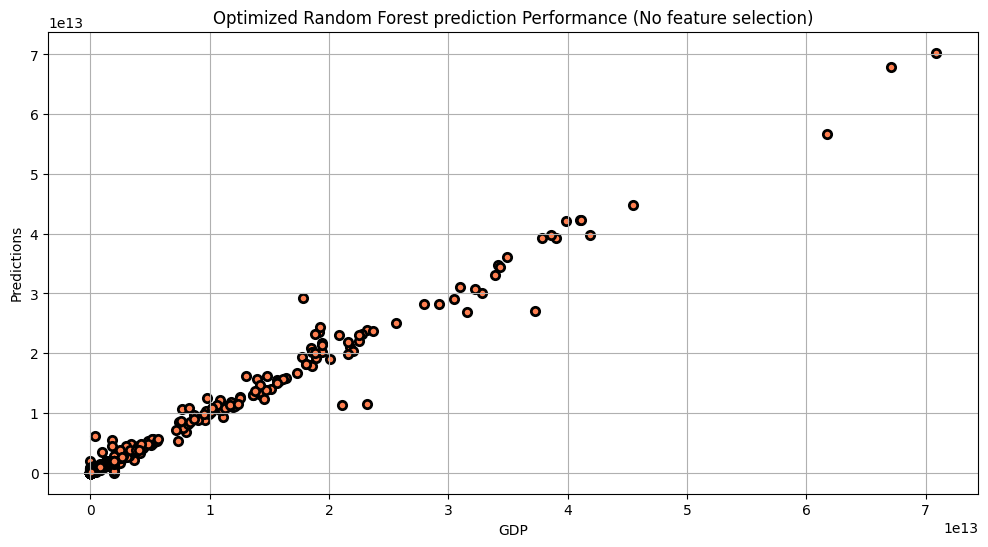

In [ ]:
# Evaluating and visualizing the performance of the optimized RandomForestRegressor model on the test set
print('Optimized Random Forest Performance:')

# Performance metrics for the optimized RandomForestRegressor model
print('MAE:', metrics.mean_absolute_error(y_test, rf_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, rf_grid_predictions))

# Scatter plot to visualize optimized RandomForestRegressor predictions against actual values
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('GDP')
plt.ylabel('Predictions')
plt.title('Optimized Random Forest prediction Performance (No feature selection)')
plt.grid()
plt.show()

In [ ]:
# Specifying the model name
model_name3 = rf_grid_predictions

# Saving the model with the model name in the file path
rf_Model_path = "/content/RF_sklearn.pkl"
joblib.dump(model_name3, rf_Model_path)

['/content/RF_sklearn.pkl']

In [ ]:
# Downloading the saved model file
from IPython.display import FileLink
FileLink(rf_Model_path)

/content/RF_sklearn.pkl

In [ ]:
# Gradient Boosting Regressor model with specified hyperparameters for the original features
gbm1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)

# Gradient Boosting Regressor model with specified hyperparameters for the selected features
gbm3 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)

# Fitting the Gradient Boosting Regressor models to the training data
gbm1.fit(X_train, y_train)
gbm3.fit(X3_train, y3_train)

GradientBoostingRegressor(random_state=101)

# Predictions - Gradient Boosting Regressor Models

In [ ]:
# Generating predictions using the trained Gradient Boosting Regressor models

# Predictions for the model with original features
gbm1_pred = gbm1.predict(X_test)

# Predictions for the model with selected features
gbm3_pred = gbm3.predict(X3_test)

# Evaluation - Gradient Boosting Regressor Models

Gradiant Boosting Performance:

all features, No scaling:
MAE: 350541263161.30786
RMSE: 876915301656.306
R2_Score:  0.9773528749937868

selected features, No scaling:
MAE: 18303621596.746166
RMSE: 74242470101.80296
R2_Score:  0.9998376685731001


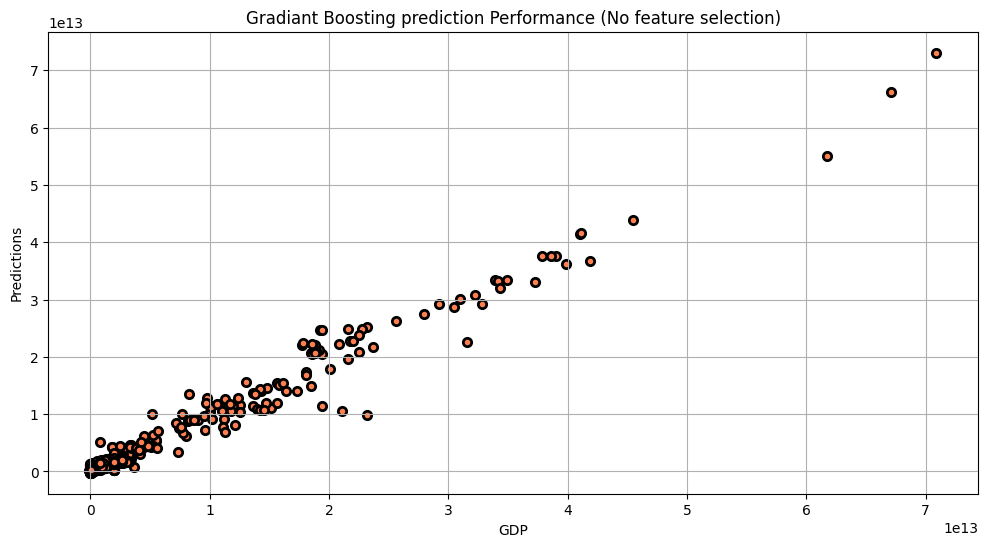

In [ ]:
# Evaluation and visualizing the performance of the Gradient Boosting Regressor models

# Printing performance metrics for the model with original features and no feature selection
print('Gradiant Boosting Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, gbm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, gbm1_pred))

# Performance metrics for the model with selected features and no feature selection
print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, gbm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, gbm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, gbm3_pred))

# Scatter plot to visualize predictions against actual values for the model with original features
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('GDP')
plt.ylabel('Predictions')
plt.title('Gradiant Boosting prediction Performance (No feature selection)')
plt.grid()
plt.show()

# GBM Regressor - Feature Importance and Visualization

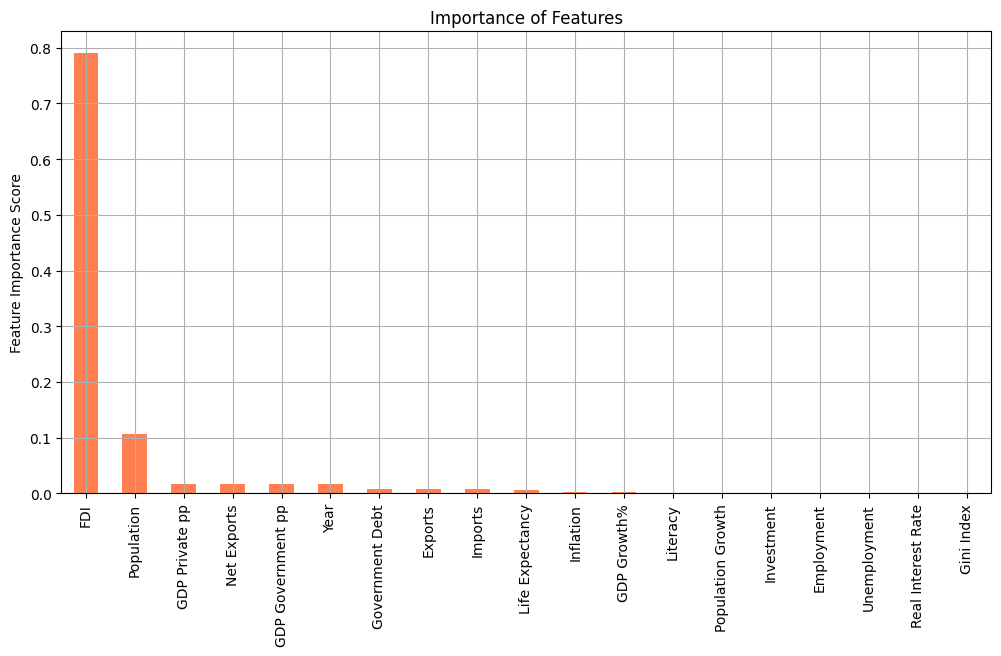

In [ ]:
# Visualizing the feature importances of the Gradient Boosting Regressor model

# Calculating feature importances and sort them in descending order
feat_imp = pd.Series(gbm1.feature_importances_, list(X_train)).sort_values(ascending=False)

# Create a bar plot to display the importance of each feature
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Importance of Features', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

# Model Optimization - Gradient Boosting Regressor

In [ ]:
# Grid search for hyperparameter tuning of Gradient Boosting Regressor

# Define a parameter grid with various hyperparameter values
gbm_param_grid = {'learning_rate':[1,0.1, 0.01, 0.001],
           'n_estimators':[100, 500, 1000],
          'max_depth':[3, 5, 8],
          'subsample':[0.7, 1],
          'min_samples_leaf':[1, 20],
          'min_samples_split':[10, 20],
          'max_features':[4, 7]}

# Create a GridSearchCV object for Gradient Boosting Regressor
gbm_tuning = GridSearchCV(estimator =GradientBoostingRegressor(random_state=101),
                          param_grid = gbm_param_grid,
                          n_jobs=-1,  # Use all available CPU cores for parallel processing
                          cv=5)   # 5-fold cross-validation

# Perform grid search to find the best hyperparameters
gbm_tuning.fit(X_train,y_train)

# Print the best hyperparameters found during the grid search
print(gbm_tuning.best_params_)

# Predictions - Best-Performing Gradient Boosting Regressor Model

In [ ]:
# Making predictions on the test set using the best-performing Gradient Boosting Regressor model obtained from the grid search
gbm_grid_predictions = gbm_tuning.predict(X_test)

# Evaluation - Optimized Gradient Boosting Regressor Model

In [ ]:
# Printing performance metrics for the optimized Gradient Boosting Regressor model
print('MAE:', metrics.mean_absolute_error(y_test, gbm_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, gbm_grid_predictions))

# Creating a scatter plot to visualize optimized Gradient Boosting predictions against actual values
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('GDP')
plt.ylabel('Predictions')
plt.title('Optimized Gradiant Boosting prediction Performance')
plt.grid()
plt.show()

# Model Optimization - Gradient Boosting Regressor model with specified hyperparameters

In [ ]:
# Creating an optimized Gradient Boosting Regressor model with specified hyperparameters
gbm_opt = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500,max_depth=5, min_samples_split=10, min_samples_leaf=1,
                                    subsample=0.7,max_features=7, random_state=101)

# Fitting the optimized model to the training data
gbm_opt.fit(X_train,y_train)

# Calculating and visualizing the feature importances of the optimized Gradient Boosting Regressor model
feat_imp2 = pd.Series(gbm_opt.feature_importances_, list(X_train)).sort_values(ascending=False)

# Creating a bar plot to display the importance of each feature (Optimized model)
fig = plt.figure(figsize=(12, 6))
feat_imp2.plot(kind='bar', title='Importance of Features (Optimized)', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

In [ ]:
# Specify the model name
model_name4 = gbm_grid_predictions

# Save the model with the model name in the file path
gbm_Model = "/content/gbm_sklearn.pkl"
joblib.dump(model_name4, gbm_Model)


In [ ]:
#Models to be used for Linear Regression. Gradient Booster, Random Forest, Support Vector Regressor
models = [model_name4, model_name3, model_name2, model_name1]


for idx, model in enumerate(models, start=1):

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model {idx} Accuracy: {accuracy:.2f}")

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    class_names = list(set(y))

    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Model {idx} Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add values in the plot
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, format(conf_matrix[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

    plt.show()